Introduction.
  First, we are going to load the data in our pandas dataframe and study some details about it.
  We are going to proceed with this project in steps that are taught to us in our learning module.So, First step is loading the data.Major steps are as follows:
  1.Getting to know our data. Its always the first step.
  2.Exploratory data analysis.
  3.Selecting a machine learning algorithm.
  4.Checking how our models did and how to improve.
  
  So, with this lets start.
  

Step 1:

Data loading and summary.

In [7]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sn


In [8]:
df = pd.read_csv("day.csv")

In [9]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [10]:
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [11]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


So, there are many things that we came to know from our data summary and info. 
First thing is that there are no null values anywhere. That means there are no missing values and no need to do missing value analysis.
So, lets check for outliers. Also, the instant column is useless and can be removed.

In [13]:
df.drop(axis = 0,columns = ['instant'])

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [14]:
category_columns = [ 'season', 'yr', 'mnth', 'holiday', 'workingday', 'weekday', 'weathersit']
for i in category_columns:
    df[i] = df[i].astype("category")

In [15]:
df.dtypes

instant          int64
dteday          object
season        category
yr            category
mnth          category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object

In [16]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [17]:
df = df.drop(axis = 1, columns= ("instant"))

In [18]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [19]:
df = df.drop(axis = 1, columns = ("dteday"))

In [20]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Alright. we have now cleaned up our data a bit and all the variables are in nice state and datatypes.
Also, we have removed the date cause all the information is already in table and instant column which was unnecessary in the first place. Now, only thing that remains are checking for outliers and checking the correlation so that we can fighure out which variables are not necessary for our model.
Again, as our task here is to only predict number of counts irrespective of registered and casual.that means we can safely remove those columns as well.


In [21]:
df= df.drop(axis = 1, columns =["casual", "registered"])

In [22]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [23]:
df.shape

(731, 12)

In [24]:
%matplotlib inline

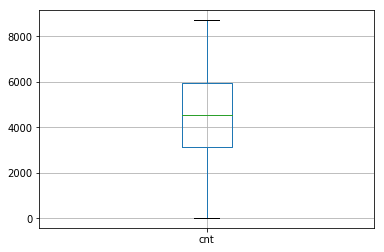

In [25]:
df.boxplot(column = ['cnt'])

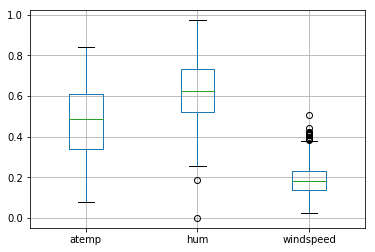

In [26]:
df.boxplot(column = ['atemp', 'hum', 'windspeed'])

So, as we can see from boxplots. There are a few outliers only in windspeed columns and all other continuous varaibles are fine.


In [27]:
df2 = df.copy()
df2.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


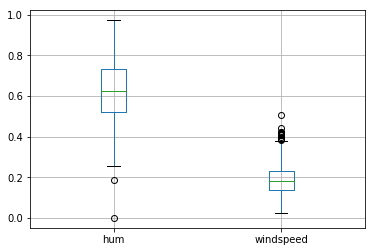

In [28]:
con_column = [ 'hum', 'windspeed']
df2.boxplot(column = con_column)

In [29]:
for i in con_column:
    q75,q25 = np.percentile(df2.loc[:,i], [75,25])
    
    iqr = q75 - q25
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    df2 = df2.drop(df2[df2.loc[:,i]<min].index)
    df2 = df2.drop(df2[df2.loc[:,i]>max].index)
    

In [30]:
df2.shape

(717, 12)

In [31]:
df2

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600
5,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,1606
6,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,1510
7,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,959
8,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,822
9,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,1321


So, as we can see from boxplots. There were just two continuous variables which had outliers. Removing those outliers results in slightly less rows . So, our data was not too bad to start with. Now, as we are done with outlier, we can start with correlation analysis.

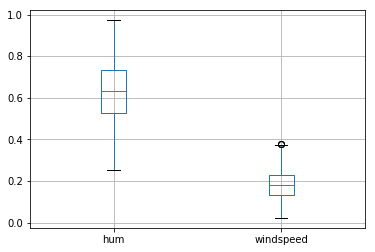

In [32]:
df2.boxplot(column = con_column)

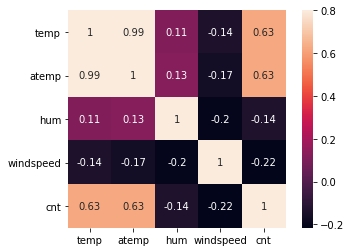

In [33]:
corrMatt = df2[["temp","atemp","hum","windspeed","cnt"]].corr()

sn.heatmap(corrMatt,vmax=.8, square=True,annot=True)

Here, every variable seem to have considerable correlation with count . So, we can not drop any of these.
Now, we will check for the type of relationships a variable have with our count.


C:\Users\Vikas\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


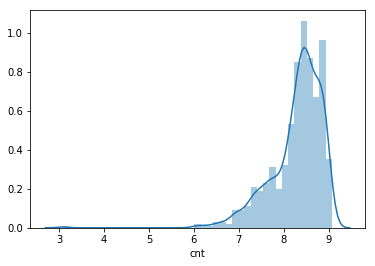

In [34]:
sn.distplot(np.log(df2['cnt']))

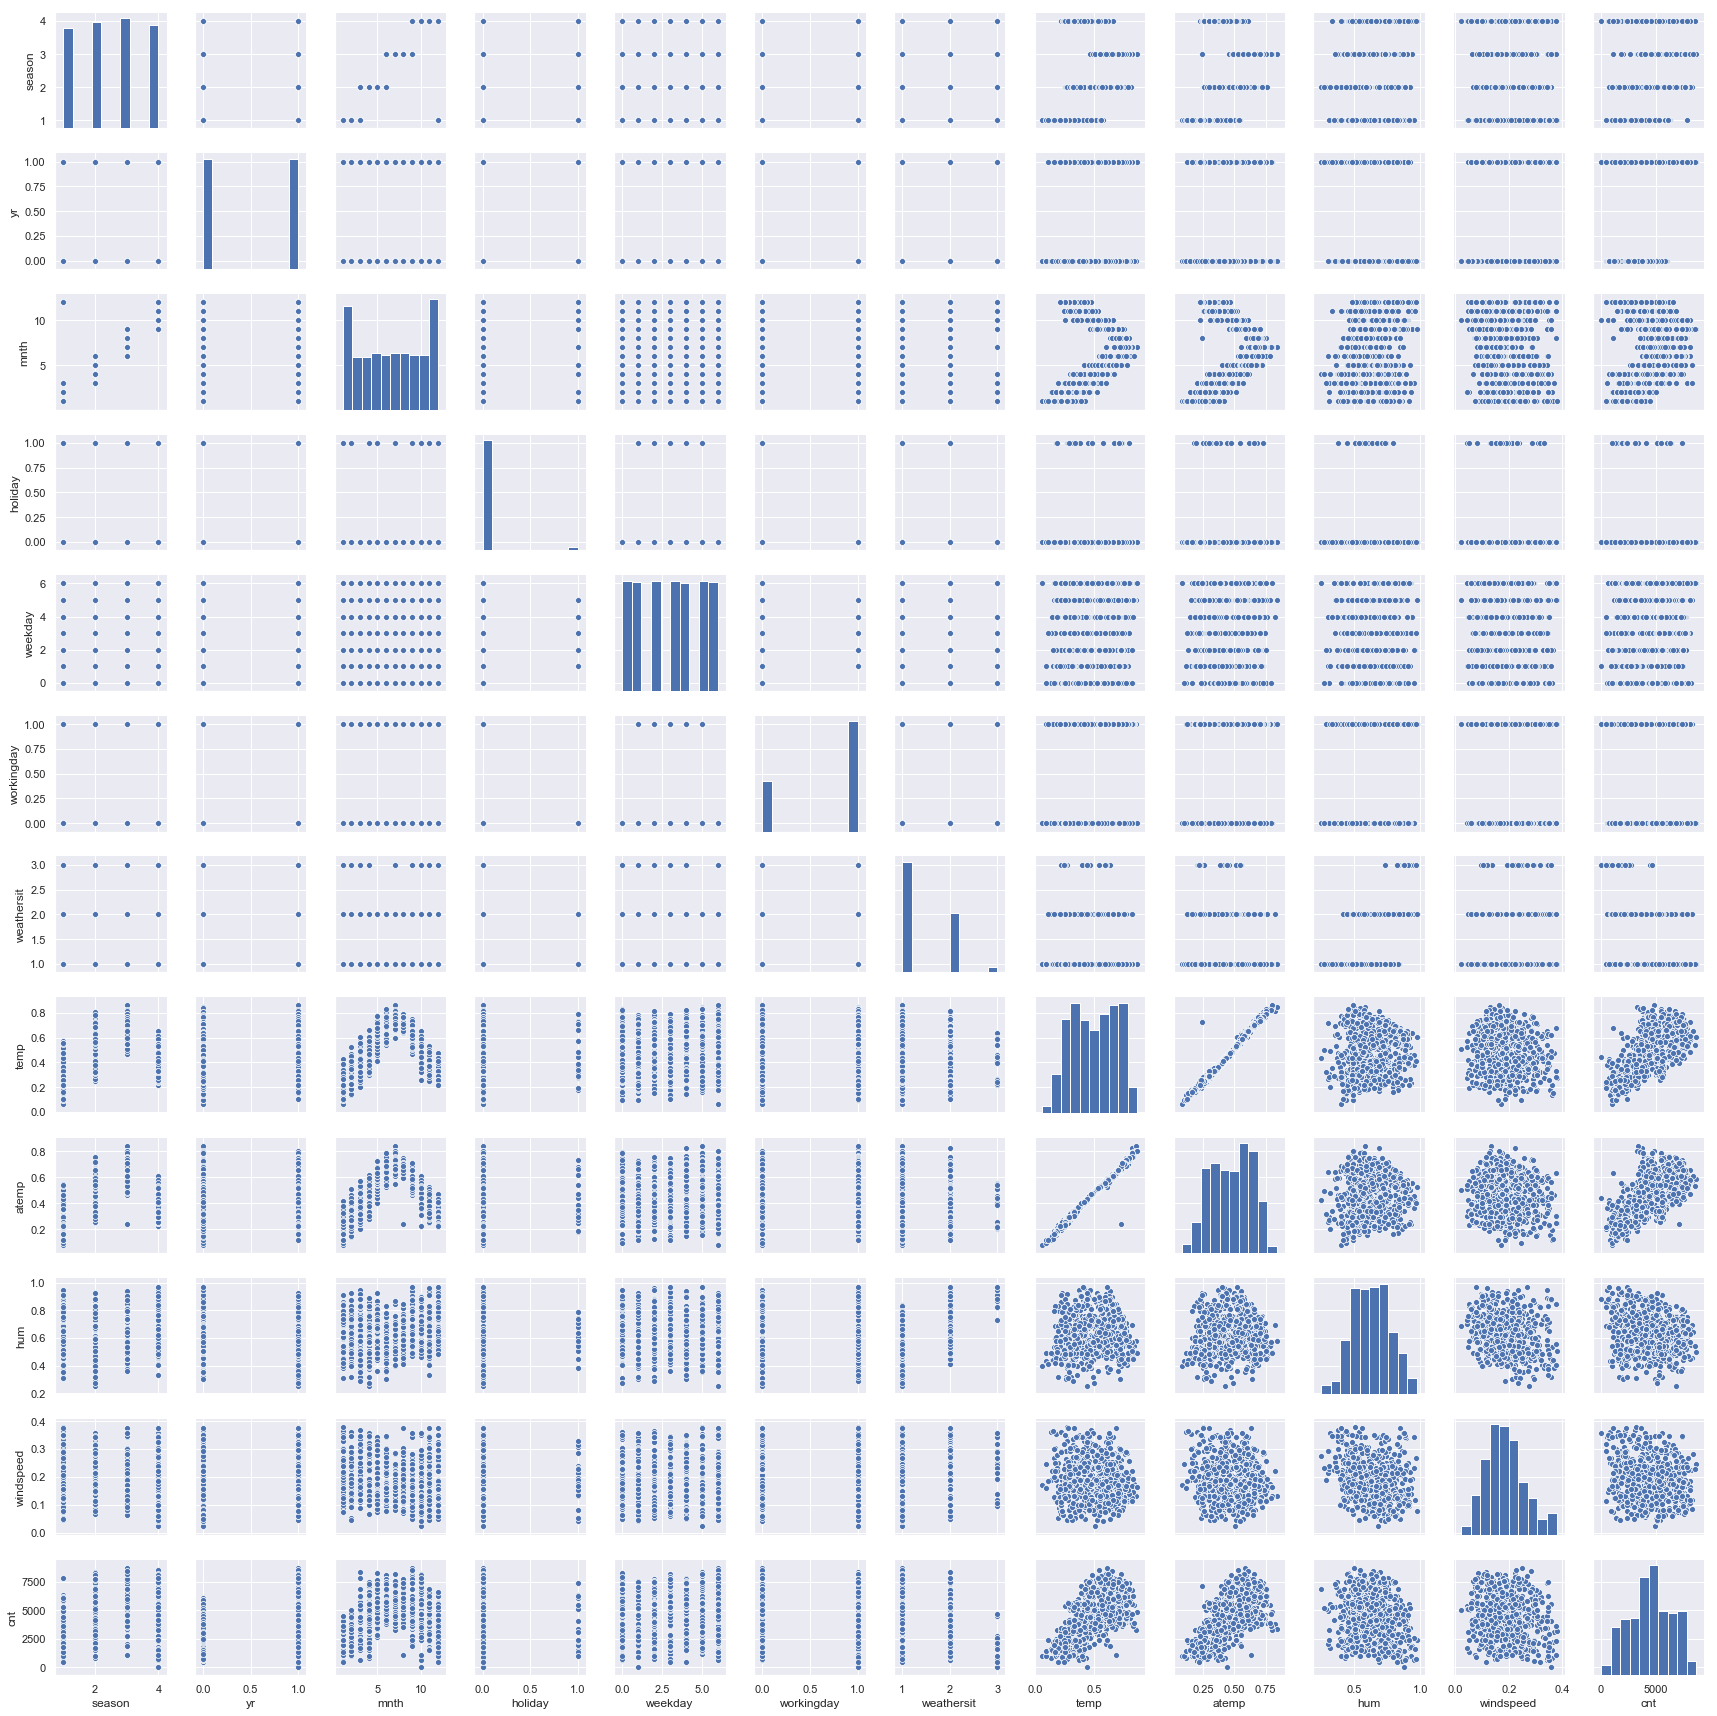

In [35]:
sn.set()
sn.pairplot(df2, height = 2)


One thing that we can see from the graphs is that temp and atemp were correlated to a great extent and its kind of obvious. So, we will need to drop temp as well. 



In [36]:
df2 = df2.drop(axis = 0 , columns =('temp'))

In [37]:
df2.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.229270,0.436957,0.186900,1600


In [38]:
print("Skewness: %f" % df2['cnt'].skew())
print("Kurtosis: %f" % df2['cnt'].kurt())

Skewness: -0.059083
Kurtosis: -0.804606


In [39]:
print("Skewness: %f" % (np.log(df2['cnt'])).skew())
print("Kurtosis: %f" % (np.log(df2['cnt'])).kurt())

Skewness: -1.972199
Kurtosis: 9.435259


Now, we are done with all kind of data preprocessing and EDA . So, we can start applying machine learning algorithms to predict our data now.
We will try and use a bunch of model and check which will work best . 
For metrics , we are going to use MAE and MSE as done usually.

In [40]:
from sklearn.model_selection import train_test_split
feature_cols = ['season', 'yr','mnth', 'weekday', 'workingday', 'weathersit', 'atemp', 'hum', 'windspeed']


In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    df2[feature_cols], df2['cnt'], test_size=0.25, random_state=25
)

In [42]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

537
180
537
180


In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [44]:
model = LinearRegression()

In [45]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [46]:
y_pred = model.predict(X_test)

C:\Users\Vikas\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


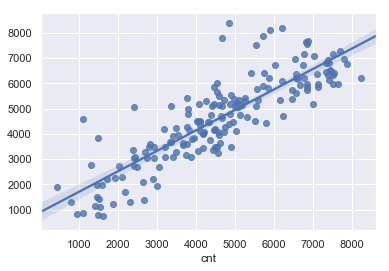

In [47]:
sn.regplot(y_test, y_pred)

In [48]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error  


In [49]:
mean_absolute_error(y_test, y_pred)

714.497897811095

In [50]:
mean_squared_error(y_test, y_pred)

899359.9028579483

In [51]:
model2 = RandomForestRegressor()
model2.fit(X_train, y_train)

C:\Users\Vikas\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [52]:
y_pred = model2.predict(X_test)

In [53]:
mean_absolute_error(y_test, y_pred)

514.4833333333333

In [54]:
mean_squared_error(y_test, y_pred)

531448.3463333334

In [55]:
from sklearn.linear_model import Ridge, Lasso

In [56]:
model3 = Ridge()

In [57]:
model3.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [58]:
y_pred3 = model3.predict(X_test)

In [59]:
mean_absolute_error(y_test, y_pred3)

718.9617619065739

As i was checking about different metrics because these metrics cant really give me idea for how good a model is .
So, i found out about RMSLE model and going to use it as well from now on, THe smalled value for this model the better it is which is kind of obvious as it is a error model but the good thing is that its value is between 0 and 1.


In [60]:
def rmsle(y, y_,convertExp=True):
    if convertExp:
        y = np.exp(y),
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [61]:
rmsle(y_test, y_pred, convertExp = False)

0.22739319533461982

In [62]:
from sklearn.ensemble import GradientBoostingRegressor

In [63]:
model4 = GradientBoostingRegressor()
model4.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [64]:
y_pred4 = model4.predict(X_test)

In [65]:
rmsle(y_test, y_pred4, convertExp = False)

0.22214180648721535

So, now as we have tried a lot of models like linear regression, ridge, lasso, randomforests and gradient boosting. We found out that radomforest and gradient boosting worked the best.

In [66]:
mean_absolute_error(y_test, y_pred4)

495.5734288816848

C:\Users\Vikas\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


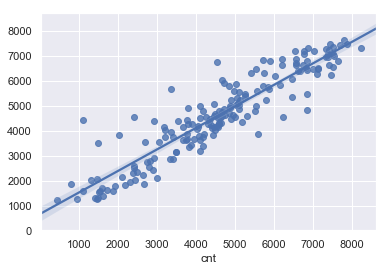

In [67]:
sn.regplot(y_test, y_pred4)

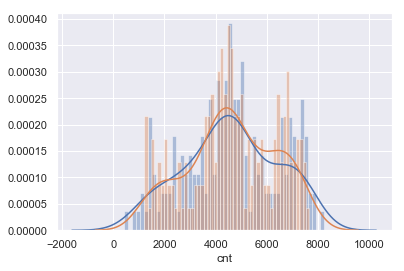

In [68]:
sn.distplot(y_test,bins=50)
sn.distplot((y_pred4),bins=50)

Even from the graph, we can identify that our model is close to the actual values.

Now, we are done with the modelling part and can have our output given any input. So. lets make a dataframe with our predictions and store it in csv.

In [69]:
df3 = df2.copy()

In [70]:
df3.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.229270,0.436957,0.186900,1600


In [71]:
df3 = X_test

In [72]:
df3['real_count'] = y_test

In [73]:
df3['pred_count'] = y_pred4

In [74]:
df3.head(20)

,season,yr,mnth,weekday,workingday,weathersit,atemp,hum,windspeed,real_count,pred_count
474,2,1,4,4,1,1,0.493046,0.612500,0.065929,6565,6873.354324
514,2,1,5,2,1,1,0.672992,0.684583,0.295400,5743,6301.912249
354,1,0,12,3,1,2,0.428017,0.858333,0.221400,2660,1848.060196
671,4,1,11,5,1,1,0.356042,0.522083,0.266175,5847,5752.344472
99,2,0,4,0,0,2,0.426737,0.857500,0.146767,2895,2432.883801
347,4,0,12,3,1,2,0.338362,0.663750,0.060958,3740,3609.662819
566,3,1,7,5,1,2,0.613025,0.844167,0.208967,5870,5663.267243
130,2,0,5,3,1,1,0.528400,0.632917,0.120642,4182,4775.795390
387,1,1,1,1,1,2,0.243058,0.911250,0.110708,2432,2015.715339
554,3,1,7,0,0,1,0.790396,0.573750,0.125629,4672,6028.619900


In [75]:
df3.to_csv('Bike_renting.csv', index = False)

These are the required outputs for sample inputs(they are actually test data but they can serve the purpose for same) that are being asked in assignment.